<font size="6">**Economic Happiness**

In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sea                 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import geopandas                            
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas                            
from shapely.geometry import Point

<font size="3">**Data Files**

In [2]:
hdi = pd.read_csv('hdi.csv')
happy = pd.read_csv('happinessrank.csv')
avgworkweek = pd.read_csv('avgworkweek.csv')
gdp = pd.read_csv('gdp.csv')
cost_of_living = pd.read_csv("cost_of_living.csv")
poverty = pd.read_csv('below_pov.csv')
murder = pd.read_csv('murder.csv')
suicide = pd.read_csv('suicide.csv')
unemployment = pd.read_csv('unemployment.csv')
population = pd.read_csv('population.csv') 
population.rename(columns={'name':'country'},inplace=True)
population['population'] = population['pop2022']*1000

<font size="3">**Merge Data**

In [3]:
merge = pd.merge(left = happy, right = hdi, on = ['country'], how = 'inner', indicator = True)
merge.drop(['pop2022_x', 'pop2022_y', '_merge', 'happinessRank'], axis = 1, inplace = True)

In [4]:
merge2 = pd.merge(left = merge, right = avgworkweek, on = ['country'], how = 'inner', indicator=True)
merge2.drop(['rank','avg2018pwt', 'avg2017pwt', 'avg2020oecd' ,'_merge'], axis = 1, inplace = True)

In [5]:
merge3 = pd.merge(left = merge2, right = gdp, on = ['country'], how = 'inner', indicator=True)
merge3.drop(['ranking','pop2022', '_merge'], axis = 1, inplace = True)

In [6]:
merge4 = pd.merge(left = merge3, right = cost_of_living, on = ['country'], how = 'inner', indicator=True)
merge4.drop(['ranking', 'rentIndex','costLivingPlusRentIndex','groceriesIndex','restaurantPriceIndex', 'localPurchasingPowerIndex', '_merge'], axis = 1, inplace = True)

In [7]:
merge5 = pd.merge(left = merge4, right = poverty, on = ['country'], how = 'inner', indicator=True)
merge5.drop(['dataYear', 'lessThan10','lessThan550','_merge'], axis = 1, inplace = True)

In [8]:
merge6 = pd.merge(left = merge5, right = murder, on = ['country'], how = 'inner', indicator=True)
merge6.drop(['rate2019male', 'rate2019female','pop2022','_merge'], axis = 1, inplace = True)

In [9]:
merge7 = pd.merge(left = merge6, right = unemployment, on = ['country'], how = 'inner', indicator=True)
merge7.drop(['yearWb', 'rateIlo','yearIlo', 'rateCia','yearCia', '_merge'], axis = 1, inplace = True)

In [10]:
merge8 = pd.merge(left = merge7, right = population, on = ['country'], how = 'inner', indicator=True)
merge8.drop(['GrowthRate','pop2022','pop2021', 'area', 'Rank', '_merge'], axis = 1, inplace = True)

In [11]:
merge8.rename(columns={'country':'COUNTRY','gdppc':'GDPPC','happinessScore':'HSCORE', 'hdi':'HDI',
                       'avg2019pwt':'AVGWORK', 'percPoverty':'POVRATE', 'costLivingIndex':'COSTLIV',
                       'rate2019both':'MRDRATE', 'rateWb':'UNEMPRATE',
                       'Density':'DENSITY', 'population':'POPULATION'},inplace=True)
num_idx = merge8 #needed for mapping later
merge8 = merge8.set_index('COUNTRY')

In [12]:
merge8.sample(5)

,HSCORE,HDI,AVGWORK,GDPPC,COSTLIV,POVRATE,MRDRATE,UNEMPRATE,DENSITY,POPULATION
COUNTRY,,,,,,,,,,
Argentina,6.086,0.830,30.9,20751,31.18,35.5,8.4,11.5,16.5481,46010234.0
Sri Lanka,4.366,0.780,37.0,13214,32.93,4.1,14.0,4.3,328.8499,21575842.0
Belgium,6.923,0.919,30.5,51096,73.59,14.8,18.3,5.5,382.2156,11668278.0
Uruguay,6.293,0.808,29.5,22459,46.66,8.8,21.2,10.5,19.3114,3496016.0
Iceland,7.494,0.938,28.0,55596,90.19,8.8,11.9,5.5,3.3533,345393.0


<font size="3">**Regression Analysis**
    
    Goal: To identify ecnomic facotrs that show strong correlation with HSCORE

<font size="2">Regression Model
    
    HSCORE = Intercept + Beta1(HDI) + Beta2(AVGWORK) + Beta3(GDPPC)+ Beta4(COSTLIV) + Beta5(POVRATE) +Beta6(MRDRATE) + Beta7(UNEMPRATE) + Beta8(DENSITY) + Beta9(POPULATION) + error term

<font size="2">Variables:
    
    HSCORE - Happiness Score (based off a poll)
    HDI - Human Development Index
    AVGWORK - Avergae Hours Worked per Week by Country
    GDPPC - Gross Domestic Product per Capita
    COSTLIV - Cost of Living Index
    POVRATE - Percent of Population Below the Poverty Line
    MRDRATE - Murder Rate per 100,000
    UNEMPRATE - Unemployment Rate
    DENSITY - Density by Country
    POPULATION - Population by Country

<font size="2">Regression

In [13]:
regression = smf.ols(formula='HSCORE ~ HDI + AVGWORK + GDPPC + POVRATE + COSTLIV + MRDRATE + UNEMPRATE + DENSITY + POPULATION', data=merge8).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 HSCORE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     14.50
Date:                Tue, 10 May 2022   Prob (F-statistic):           4.50e-11
Time:                        20:18:38   Log-Likelihood:                -41.120
No. Observations:                  59   AIC:                             102.2
Df Residuals:                      49   BIC:                             123.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4546      1.754      2.540      0.0

Regression with only significant variables, those with a P>|T| is less than 0.05. 

(HDI, AVGWORK, COSTLI)

In [14]:
regression = smf.ols(formula='HSCORE ~ HDI + AVGWORK + COSTLIV', data=merge8).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 HSCORE   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     41.65
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.19e-14
Time:                        20:18:38   Log-Likelihood:                -45.735
No. Observations:                  61   AIC:                             99.47
Df Residuals:                      57   BIC:                             107.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7670      1.565      3.046      0.0

<font size="2">Adjusted Regression Model
    
    HSCORE = Intercept + Beta1(HDI) - Beta2(AVGWORK) + Beta3(COSTLIV) + error term

In [15]:
full_data = merge8
full_data.drop(['GDPPC', 'POVRATE', 'MRDRATE', 'UNEMPRATE', 'DENSITY', 'POPULATION'], axis = 1, inplace = True)

<font size="2">Creating Our Own Variable, Economic Happiness (EH)
    
    EH = HSCORE (percentile) + HDI (percentile) - AVGWORK (percentile) + COSTLIV (percentile)

In [16]:
full_data['HSCORE%'] = full_data['HSCORE']/full_data['HSCORE'].max()*100
full_data['HDI%'] = full_data['HDI']/full_data['HDI'].max()*100
full_data['AVGWORK%'] = full_data['AVGWORK']/full_data['AVGWORK'].max()*100
full_data['COSTLIV%'] = full_data['COSTLIV']/full_data['COSTLIV'].max()*100
full_data['EH'] = (full_data['HSCORE%'] + full_data['HDI%'] + full_data['COSTLIV%']-full_data['AVGWORK%'])

full_data_sort = full_data.sort_values(['EH'], ascending=False)

In [17]:
#making overall score column where index of table is numeric
num_idx['HSCORE%'] = num_idx['HSCORE']/num_idx['HSCORE'].max()*100
num_idx['HDI%'] = num_idx['HDI']/num_idx['HDI'].max()*100
num_idx['AVGWORK%'] = num_idx['AVGWORK']/num_idx['AVGWORK'].max()*100
num_idx['COSTLIV%'] = num_idx['COSTLIV']/num_idx['COSTLIV'].max()*100
num_idx['OVERALLSCORE'] = (num_idx['HSCORE%'] + num_idx['HDI%'] + num_idx['COSTLIV%']-num_idx['AVGWORK%'])
num_idx.drop(['GDPPC', 'POVRATE', 'MRDRATE', 'UNEMPRATE', 'DENSITY', 'POPULATION'], axis = 1, inplace = True)

num_idx = num_idx.sort_values(['OVERALLSCORE'], ascending=False)

<font size="2">Rankings to Differentiate between HSCORE and EH

In [18]:
full_data['HSCORE RANK'] = full_data['HSCORE'].rank(ascending=False)
full_data['EH RANK'] = full_data['EH'].rank(ascending=False)
full_data["DIFF RANK"] = full_data["HSCORE RANK"] - full_data["EH RANK"]
full_data = full_data.sort_values(by=['DIFF RANK'], ascending=False)
full_data

,HSCORE,HDI,AVGWORK,COSTLIV,HSCORE%,HDI%,AVGWORK%,COSTLIV%,EH,HSCORE RANK,EH RANK,DIFF RANK
COUNTRY,,,,,,,,,,,,
Japan,5.886,0.915,32.5,86.22,75.762646,95.911950,68.277311,68.597343,171.994628,40.0,18.0,22.0
South Korea,5.895,0.906,38.1,75.93,75.878491,94.968553,80.042017,60.410534,151.215562,38.0,24.0,14.0
Croatia,5.432,0.837,35.2,56.31,69.918908,87.735849,73.949580,44.800700,128.505878,47.0,33.0,14.0
Bulgaria,5.011,0.816,31.6,38.39,64.499936,85.534591,66.386555,30.543400,114.191373,55.0,42.0,13.0
Greece,5.287,0.872,39.2,57.50,68.052516,91.404612,82.352941,45.747474,122.851661,51.0,38.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Pakistan,5.653,0.560,37.8,21.00,72.763547,58.700210,79.411765,16.707773,68.759765,44.0,57.0,-13.0
Colombia,6.125,0.761,37.9,29.02,78.838975,79.769392,79.621849,23.088551,102.075070,30.0,47.0,-17.0
Brazil,6.300,0.761,32.8,30.99,81.091518,79.769392,68.907563,24.655899,116.609246,24.0,41.0,-17.0


<font size="2">**GRAPHICAL REPRESENTATIONS**

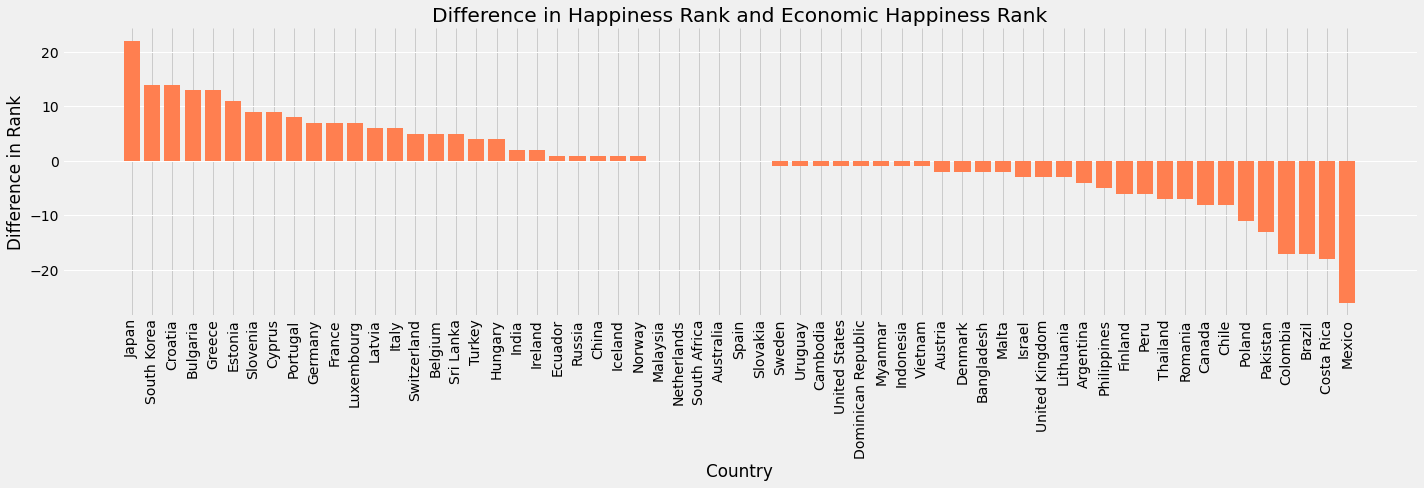

In [19]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(20,7))
ax.bar(full_data.index, full_data["DIFF RANK"], color = 'coral')
ax.set_title('Difference in Happiness Rank and Economic Happiness Rank')
ax.set_xlabel('Country')
ax.set_ylabel('Difference in Rank')
ax.tick_params(axis='x', labelrotation=90)
#fig.tight_layout()
ax.spines['top'].set_visible(False)
ax.grid(color = "white", axis = 'y')
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('rankdif.svg')

<font size= "2">**MAPS**

In [20]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'), geometry = 'geometry')
world.drop(["continent", "iso_a3", "gdp_md_est"], axis = 1, inplace = True)

In [21]:
country_codes = {"United States": "United States of America", "Ivory Coast": "Côte d'Ivoire", 
                 "Republic of the Congo": "Dem Rep. Congo", "Central African Republic": "Central African Rep.",
                 "Czech Republic":"Czechia"}
num_idx["COUNTRY"].replace(country_codes, inplace = True)

In [22]:
map_score = pd.merge(left = world, right = num_idx, left_on = ["name"], right_on = ["COUNTRY"], how = "left", indicator = True)

In [23]:
#make overall scores & happiness scores zero where data does not overalp
map_score['OVERALLSCORE'] = map_score['OVERALLSCORE'].fillna(0)
map_score['HSCORE'] = map_score['HSCORE'].fillna(0)

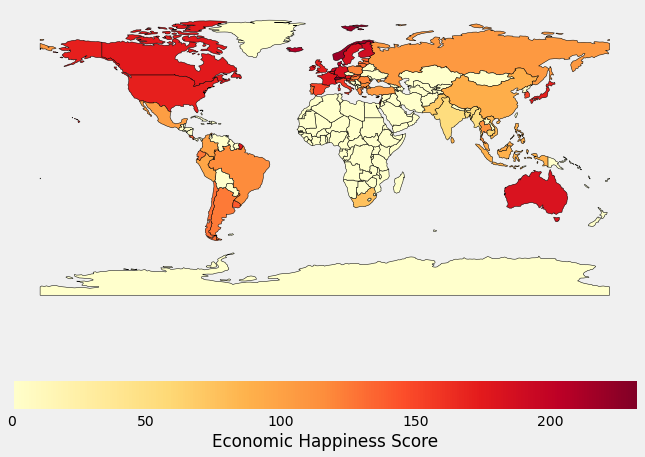

<Figure size 432x288 with 0 Axes>

In [24]:
#Map of Economic Happiness
fig, gax = plt.subplots(figsize=(10,8))
map_score.plot(ax = gax, column='OVERALLSCORE', edgecolor='black', cmap = 'YlOrRd',
               legend_kwds={'label': 'Economic Happiness Score','orientation': "horizontal"}, legend=True)
plt.axis('off')
plt.show()
plt.tight_layout()
fig.savefig('econhappy.svg')

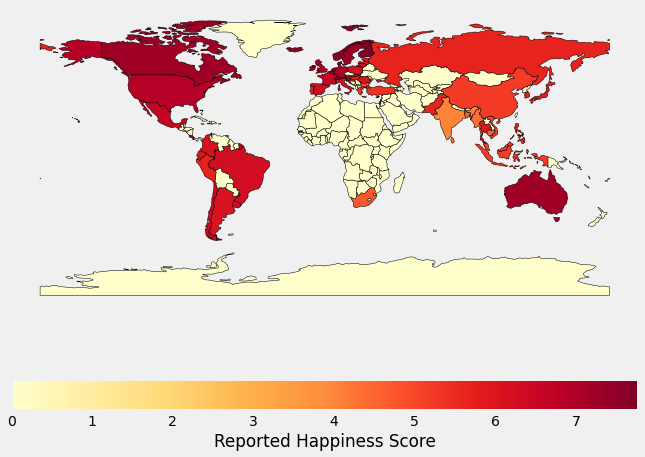

<Figure size 432x288 with 0 Axes>

In [25]:
#Map of Reported Happiness
fig, gax = plt.subplots(figsize=(10,8))
map_score.plot(ax = gax, column='HSCORE', edgecolor='black', cmap = 'YlOrRd',
               legend_kwds={'label': 'Reported Happiness Score','orientation': "horizontal"}, legend=True)
plt.axis('off')
plt.show()
plt.tight_layout()
fig.savefig('rephappy.svg')